# Homework 2 Statistical Simulation

1. See attached documents for inverse transforms

In [14]:
import numpy as np
import scipy.stats as st
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Q1

Creo una lista con los tamaños de muestra crecientes, de 50 hasta 1000 con incrementos de 50.

In [44]:
s_sizes = list(range(50,1050,50))

Cauchy:

In [45]:
cauchy = []

Genero las variables utilizando su transformación inversa y uniformes para cada uno de los tamaños de muestra: 

In [46]:
for i in range(len(s_sizes)):
    n = s_sizes[i]
    u = np.random.uniform(size=n)
    cau = [math.tan(math.pi*(u[j]-1/2)) for j in range(n)]
    cauchy.append(cau)

In [47]:
len(cauchy)

20

In [48]:
len(cauchy[0])

50

In [49]:
len(cauchy[19])

1000

Para ilustrar como cambia conforme la muestra incrementa, ahora ploteo los casos con muestra de 50, de 550 y de 1000:

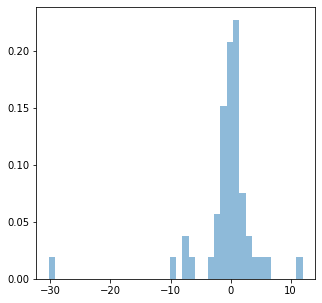

In [50]:
fig = plt.figure(figsize=(5,5))
ax_1 = plt.hist(cauchy[0], alpha=.5, density=True, bins=40)

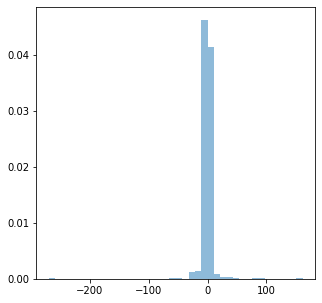

In [51]:
fig = plt.figure(figsize=(5,5))
ax_1 = plt.hist(cauchy[10], alpha=.5, density=True, bins=40)

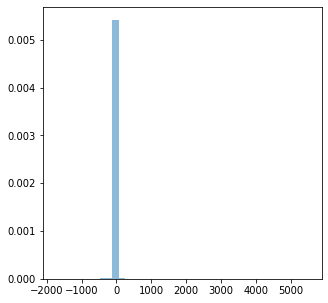

In [52]:
fig = plt.figure(figsize=(5,5))
ax_1 = plt.hist(cauchy[19], alpha=.5, density=True, bins=40)

Gumbel:

In [54]:
gumbel = []

El procedimiento es el mismo pero con la función inversa apropiada.

In [55]:
for i in range(len(s_sizes)):
    n = s_sizes[i]
    u = np.random.uniform(size=n)
    gum = [-1*np.log(-np.log(u[j])) for j in range(n)]
    gumbel.append(gum)

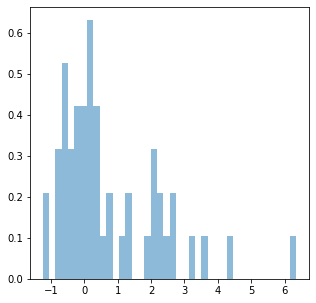

In [79]:
fig = plt.figure(figsize=(5,5))
ax_1 = plt.hist(gumbel[0], alpha=.5, density=True, bins=40)

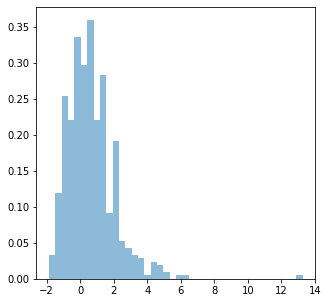

In [80]:
fig = plt.figure(figsize=(5,5))
ax_1 = plt.hist(gumbel[10], alpha=.5, density=True, bins=40)

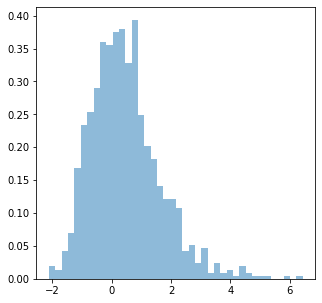

In [81]:
fig = plt.figure(figsize=(5,5))
ax_1 = plt.hist(gumbel[19], alpha=.5, density=True, bins=40)

Logistic:

In [86]:
logistic = []

In [87]:
for i in range(len(s_sizes)):
    n = s_sizes[i]
    u = np.random.uniform(size=n)
    log = [-1*np.log(1/u[j]-1) for j in range(n)]
    logistic.append(log)

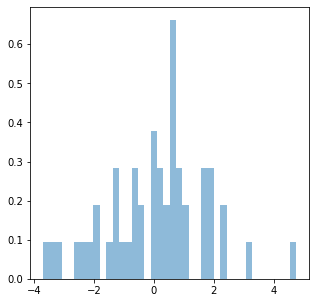

In [88]:
fig = plt.figure(figsize=(5,5))
ax_1 = plt.hist(logistic[0], alpha=.5, density=True, bins=40)

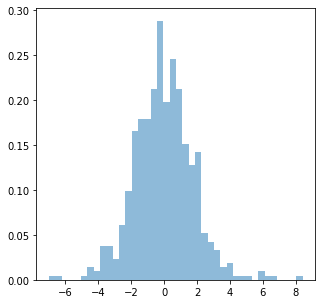

In [89]:
fig = plt.figure(figsize=(5,5))
ax_1 = plt.hist(logistic[10], alpha=.5, density=True, bins=40)

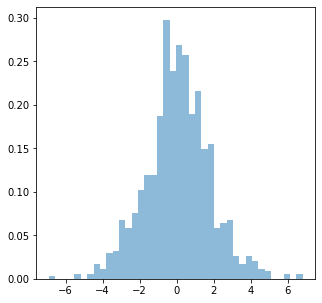

In [90]:
fig = plt.figure(figsize=(5,5))
ax_1 = plt.hist(logistic[19], alpha=.5, density=True, bins=40)

Pareto:

In [91]:
pareto = []

In [92]:
for i in range(len(s_sizes)):
    n = s_sizes[i]
    u = np.random.uniform(size=n)
    par = [1/((1-u[j])**(1/2)) for j in range(n)]
    pareto.append(par)

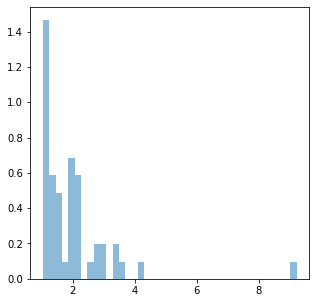

In [93]:
fig = plt.figure(figsize=(5,5))
ax_1 = plt.hist(pareto[0], alpha=.5, density=True, bins=40)

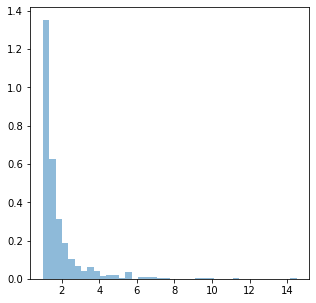

In [97]:
fig = plt.figure(figsize=(5,5))
ax_1 = plt.hist(pareto[10], alpha=.5, density=True, bins=40)

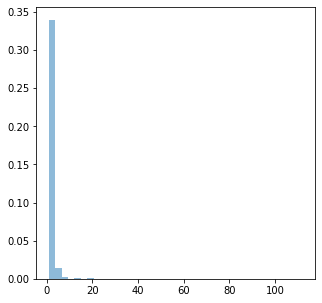

In [98]:
fig = plt.figure(figsize=(5,5))
ax_1 = plt.hist(pareto[19], alpha=.5, density=True, bins=40)

## Q2

A continuación se escriben las funciones:

In [9]:
def random_pareto(n,a,c):
    if a < 0 or c < 0:
        return None
    else:
        return c/(1-np.random.uniform(size=n)**(1/a))

In [10]:
def pareto_density(x,c,a):
    if a < 0 or x < c or c < 0:
        return None
    else: 
        f = (a*(c**a))/(x**(a+1))
    return f

In [11]:
def ppareto(x,a,c):
    if a < 0 or x < c or c < 0:
        return None
    else: 
        p = 1-((c/x)**a)
    return p

In [12]:
def qpareto(p,a,c):
    if a < 0 or x < c or c < 0:
        return None
    else: 
        q = c/((1-p)**(1/a))
    return q

Ahora observa cómo las uso:

In [16]:
random_pareto(10,2,1)

array([10.02324738,  1.90823542, 18.80997848,  9.09870726,  2.49030006,
        2.40906743,  2.50476092, 14.40785549,  1.87356745, 43.99065155])

## Q3

In [57]:
from collections import Counter

In [58]:
support = np.array([0,1,2,3,4])

In [59]:
probs = [.1,.2,.2,.2,.3]

Generación por transformación inversa:

In [60]:
def discrete_inv(size):
    outcomes = []
    u = np.random.uniform(size=size)
    for i in range(size):
        if u[i] <= 1/10:
            outcomes.append(0)
        elif u[i] > 1/10 and u[i] <= 3/10:
            outcomes.append(1)
        elif u[i] > 3/10 and u[i] <= 5/10:
            outcomes.append(2)
        elif u[i] > 5/10 and u[i] <= 7/10:
            outcomes.append(3)
        else:
            outcomes.append(4)
    return outcomes

Ahora utilizo la función especificada para generar las variables:

In [61]:
inv_t_vars = discrete_inv(10000)

Utilizo Counter para saber cuántas hay de cada una: 

In [62]:
counts = Counter(inv_t_vars)

In [63]:
inv_probs = np.array([counts[0],counts[1],counts[2],counts[3],counts[4]])/10000

In [64]:
inv_probs

array([0.103 , 0.2016, 0.204 , 0.1926, 0.2988])

Observa cómo las probabilidades sí son muy cercanas a las teoricas. 

Generación empírica por sampling:

In [196]:
random_var = st.rv_discrete(values=(support,probs))

In [197]:
randoms = random_var.rvs(size=10000)

In [198]:
counts = Counter(randoms)

In [199]:
empirical_probs = np.array([counts[0],counts[1],counts[2],counts[3],counts[4]])/10000

In [200]:
print(empirical_probs)

[0.0964 0.2013 0.2065 0.2068 0.289 ]


Entonces por ambos métodos obtenemos probabilidades empíricas muy similares. 

## Q4

Primero defino la función de la indicadora, así como las funciones de densidad y acumulada para cada caso (a) y (b):

In [201]:
def ix(a,b,x):
    if x >= a and x <= b:
        indicator = 1
    else:
        indicator = 0
    return indicator

In [206]:
def f(x):
    f = 3/2*x**2*ix(-1,1,x)
    return f

In [302]:
def F(x):
    if x < -1:
        F = 0
    elif x >= -1 and x <= 1:
        F = 1/2*(x**3+1)
    else:
        F = 1
    return F

In [282]:
def f2(x, a):
    if x <= 0:
        f2 = 0
    elif x >= 0 and x <= a:
        f2 = x/(a*(1-a))
    elif x >= a and x <= (1-a):
        f2 = 1/(1-a)
    elif (1-a) <= x and x <= 1:
        f2 = (1-x)/a*(1-a)
    else:
        f2 = 0
    return f2

In [320]:
def F2(x,a):
    if x <= 0:
        F2 = 0
    elif x >= 0 and x <= a:
        F2 = x**2*(1/(2*a*(1-a)))
    elif x >= a and x <= (1-a):
        F2 = (1/(1-a))*x
    elif (1-a) <= x and x <= 1:
        F2 = x/(a*(1-a)) - x**2/(2*a*(1-a))
    else:
        F2 = 1
    return F2

In [263]:
X = np.linspace(-1.5,1.5,1000)

Ahora utilizo las funciones para generar las variables:

In [264]:
Yf = [f(X[i]) for i in range(len(X))]

In [265]:
YF = [F(X[i]) for i in range(len(X))]

Grafico la rensidad y la acumulada: 

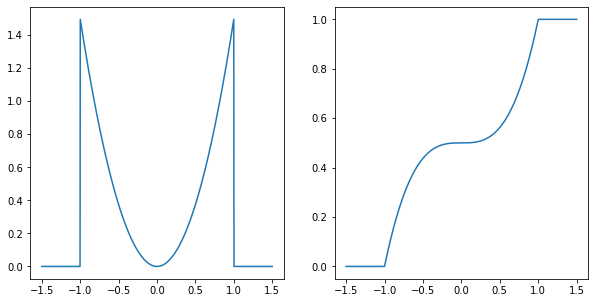

In [266]:
fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
_ = plt.plot(X,Yf)
plt.subplot(1,2,2)
_ = plt.plot(X, YF)

Ahora se repite el proceso para la función del caso (b)

In [321]:
Yf2 = [f2(X[i],a=1/3) for i in range(len(X))]

In [322]:
YF2 = [F2(X[i],a=1/3) for i in range(len(X))]

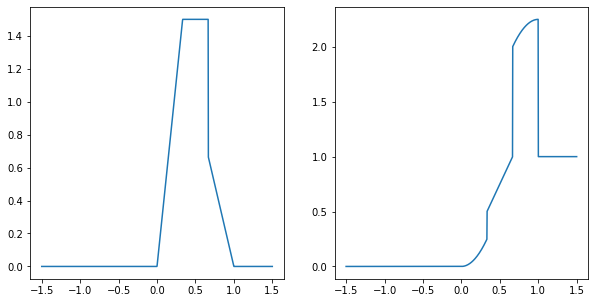

In [323]:
fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
_ = plt.plot(X,Yf2)
plt.subplot(1,2,2)
_ = plt.plot(X, YF2)

## Q5

In [336]:
math.pi/4

0.7853981633974483

Sabemos que el método de Marsaglia genera vectores que pueden, o no, caer dentro del círculo unitario dentro del cuadrado unitario. 

In [331]:
circle = math.pi*.5**2

In [337]:
circle

0.7853981633974483

In [332]:
square = 1

In [333]:
not_accept = square - circle

In [334]:
not_accept

0.21460183660255172

Y sabemos que fenómenos de aceptación-rechazo pueden modelarse con una distribución geométrica, donde la probabilidad de aceptación es .7853. Además sabemos que la media de la geométrica es 1/p, tal que 1/.7853... es aproximadamente 1.27; es decir, en promedio 1.27 ejecuciones del paso 1 antes de que ocurra una aceptación. 

## Q6

Voy a definir la función en Python:

In [6]:
def discrete_f(k):
    support_k = np.array(range(1,k+1))
    x = np.random.choice(support_k)
    y = x*(2/(k*(k+1)))
    return y

Veo que sí funciona:

In [7]:
discrete_f(100)

0.0029702970297029703

Entonces genero una muestra de 10,000 valores:

In [8]:
X = [discrete_f(100) for i in range(10000)]

In [10]:
X[0:10]

[0.017425742574257427,
 0.008514851485148515,
 0.012871287128712872,
 0.0023762376237623766,
 0.009900990099009901,
 0.0029702970297029703,
 0.005940594059405941,
 0.0025742574257425744,
 0.0029702970297029703,
 0.00039603960396039607]

Entonces el vector X contiene la muestra de 10,000 instancias con la función especificada. Nótese que como no especificamos probabilidades en np.random.choice, se tomó el default que es la uniforme, como debe de ser. 

## Q7

In [15]:
from time import process_time

Sabemos que la binomial es igual a la suma de Bernoullis. El método de convolución utiliza la suma de variables para llegar a una nueva distribución. Entonces podemos generar una binomial de esta manera.

In [16]:
def get_binomial(m,n,p):
    u = np.random.uniform(size=m)
    X = [1 if u[i] <= p else 0 for i in range(m)]
    return sum(X)

In [17]:
get_binomial(100000,10,.4)

40053

In [18]:
bins = np.random.binomial(10,.4,100000)

In [19]:
np.sum(bins)

399629

In [20]:
start = process_time()
get_binomial(100000,10,.4)
end = process_time()
print('Tiempo en segundos', end - start)

Tiempo en segundos 0.046800299999999684


In [21]:
start = process_time()
np.random.binomial(10,.4,100000)
end = process_time()
print('Tiempo en segundos', end - start)

Tiempo en segundos 0.0


Entonces nota que la alternativa de Python es mejor a la que construimos nosotros. 

## Q8

1. Ver documentos adjuntos

## Q9

Defino la función de Epanechnikov:

In [370]:
def epanechnikov(s):
    sample = []
    for i in range(s):
        triplet = np.random.uniform(-1,1,size=3)
        if np.abs(triplet[2]) >= np.abs(triplet[1]) and np.abs(triplet[2]) >= np.abs(triplet[0]):
            sample.append(triplet[1])
        else:
            sample.append(triplet[2])
    return sample

Genero datos:

In [372]:
epchnikov = epanechnikov(10000)

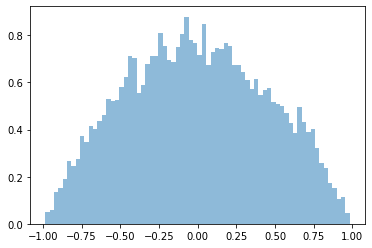

In [376]:
_ = plt.hist(epchnikov, alpha=.5, density=True, bins=70)

## Q10

In [22]:
n, p = 1, .09245

Voy a generar 100,000 casos de vectores de 1,0 con tamaño 1000 cada uno. Cada vector es un escenario donde los 1 son la cantidad de asegurados que sí hicieron reclamaciones.

In [32]:
successes = np.random.binomial(n, p, size=(100000,1000))

Ahora generaré 100,000 casos de vectores con valores provenientes de una distribución gamma. Cada uno de estos sería el valor de una reclamación. Cada vector tiene 1000 valores, es decir, las reclamaciones monetarias que tendrían esos 1000 asegurados en ese escenario en particular.

In [33]:
amounts = np.random.gamma(7000,1,size=(100000,1000))

In [34]:
sim = []

La sumaproducto de los montos reclamados por la gente que sí hace un reclamo, para cada uno de los 100,000 escenarios, es igual a la suma de los reclamos en ese escenario. Voy a obtener 100,000 de estas sumas. Quiero ver cuántas son mayores a $500,000.

In [35]:
for i in range(100000):
    suma = np.dot(successes[i],amounts[i])
    sim.append(suma)

In [36]:
sim_df = pd.DataFrame(sim, columns=['Amounts'])

In [38]:
(np.sum(sim_df.Amounts > 500000))/100000

0.99078

Entonces casi en todas las ocasiones (99%) la suma de reclamos excede 500,000.

## Q11

Ver documentos adjuntos.